## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검증해봅니다.

## 3. 라이브러리 로드

In [1]:
# 분석에 사용할 Pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화할 수 있습니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글폰트 설정

In [2]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리 합니다.
# # 나눔고딕 설치
# # 이 코드 사용 시 아래에 있는 폰트를 로드할 경우 colab 에서는 오류가 발생하므로
# # 아래에 있는 폰트 설정은 반드시 주석처리 바랍니다.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc('axes', unicode_minus=False)

In [3]:
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드합니다.
import os

# 윈도우, 맥 외의 OS 는 별도 설정 바랍니다.
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 더욱 선명하게 보입니다.
# 폰트 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기
* 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 만 40세 이상의 피부양자, 세대주인 지역가입자와 만 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중 만 40세와 만 66세에 도달한 이들이 받게되는 생애전환기 건강진단 수검 이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도 코드 등)와 검진내역(신장, 체중, 총 콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스(http://nhiss.nhis.or.kr/op/it/index.do)에서 다운로드 가능

* 건강검진정보(2017) 다운로드 받기: https://www.data.go.kr/dataset/15007122/fileData.do
* 2018년 데이터로 실습을 하셔도 됩니다. 다만, encoding 과 컬럼명이 다르므로 2018년 데이터에 맞게 고쳐주시면 됩니다.
* 2018년 외 다른 연도의 데이터로 실습을 하고자 한다면 컬럼명과 인코딩에 주의해주세요.

In [5]:
# 다운로드 받은 파일을 Pandas 의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

df = pd.read_csv('data/NHIS_OPEN_GJ_2018.csv')
df.shape

(1000000, 34)

### 5.1. 데이터 미리보기

In [6]:
# sample, head, tail 을 통해 데이터를 미리보기 합니다.

df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [7]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2018,999996,2,11,41,165,75,84.0,1.2,1.2,...,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
999996,2018,999997,1,7,41,170,75,88.0,2.0,2.0,...,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
999997,2018,999998,1,8,41,175,80,87.0,1.2,1.2,...,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
999998,2018,999999,1,11,41,165,70,80.2,0.9,1.2,...,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
999999,2018,1000000,1,5,47,165,60,70.0,1.5,1.2,...,11.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219


In [8]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
300241,2018,300242,1,8,27,175,65,76.0,1.0,1.0,...,25.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


## 6. 기본정보 보기

In [9]:
# info 를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999586 non-null   float64
 8   시력(좌)         999747 non-null   float64
 9   시력(우)         999734 non-null   float64
 10  청력(좌)         999783 non-null   float64
 11  청력(우)         999783 non-null   float64
 12  수축기혈압         994270 non-null   float64
 13  이완기혈압         994270 non-null   float64
 14  식전혈당(공복혈당)    994085 non-null   float64
 15  총콜레스테롤        332756 non-null   float64
 16  트리글리세라이드      332748 non-null   float64
 17  HDL콜레스테롤      332746 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기

In [16]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum 을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()
# True/False 를 더하면(sum) 숫자가 나온다

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                414
시력(좌)               253
시력(우)               266
청력(좌)               217
청력(우)               217
수축기혈압              5730
이완기혈압              5730
식전혈당(공복혈당)         5915
총콜레스테롤           667244
트리글리세라이드         667252
HDL콜레스테롤         667254
LDL콜레스테롤         674122
혈색소                5914
요단백               10570
혈청크레아티닌            5906
(혈청지오티)AST         5906
(혈청지오티)ALT         5906
감마지티피              5909
흡연상태                234
음주여부             354943
구강검진수검여부              0
치아우식증유무          600008
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               600007
데이터공개일자               0
dtype: int64

In [18]:
# isna 로도 결측치 여부를 확인하고 sum 을 통해 결측치 수를 집계할 수 있습니다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                414
시력(좌)               253
시력(우)               266
청력(좌)               217
청력(우)               217
수축기혈압              5730
이완기혈압              5730
식전혈당(공복혈당)         5915
총콜레스테롤           667244
트리글리세라이드         667252
HDL콜레스테롤         667254
LDL콜레스테롤         674122
혈색소                5914
요단백               10570
혈청크레아티닌            5906
(혈청지오티)AST         5906
(혈청지오티)ALT         5906
감마지티피              5909
흡연상태                234
음주여부             354943
구강검진수검여부              0
치아우식증유무          600008
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               600007
데이터공개일자               0
dtype: int64

<AxesSubplot:>

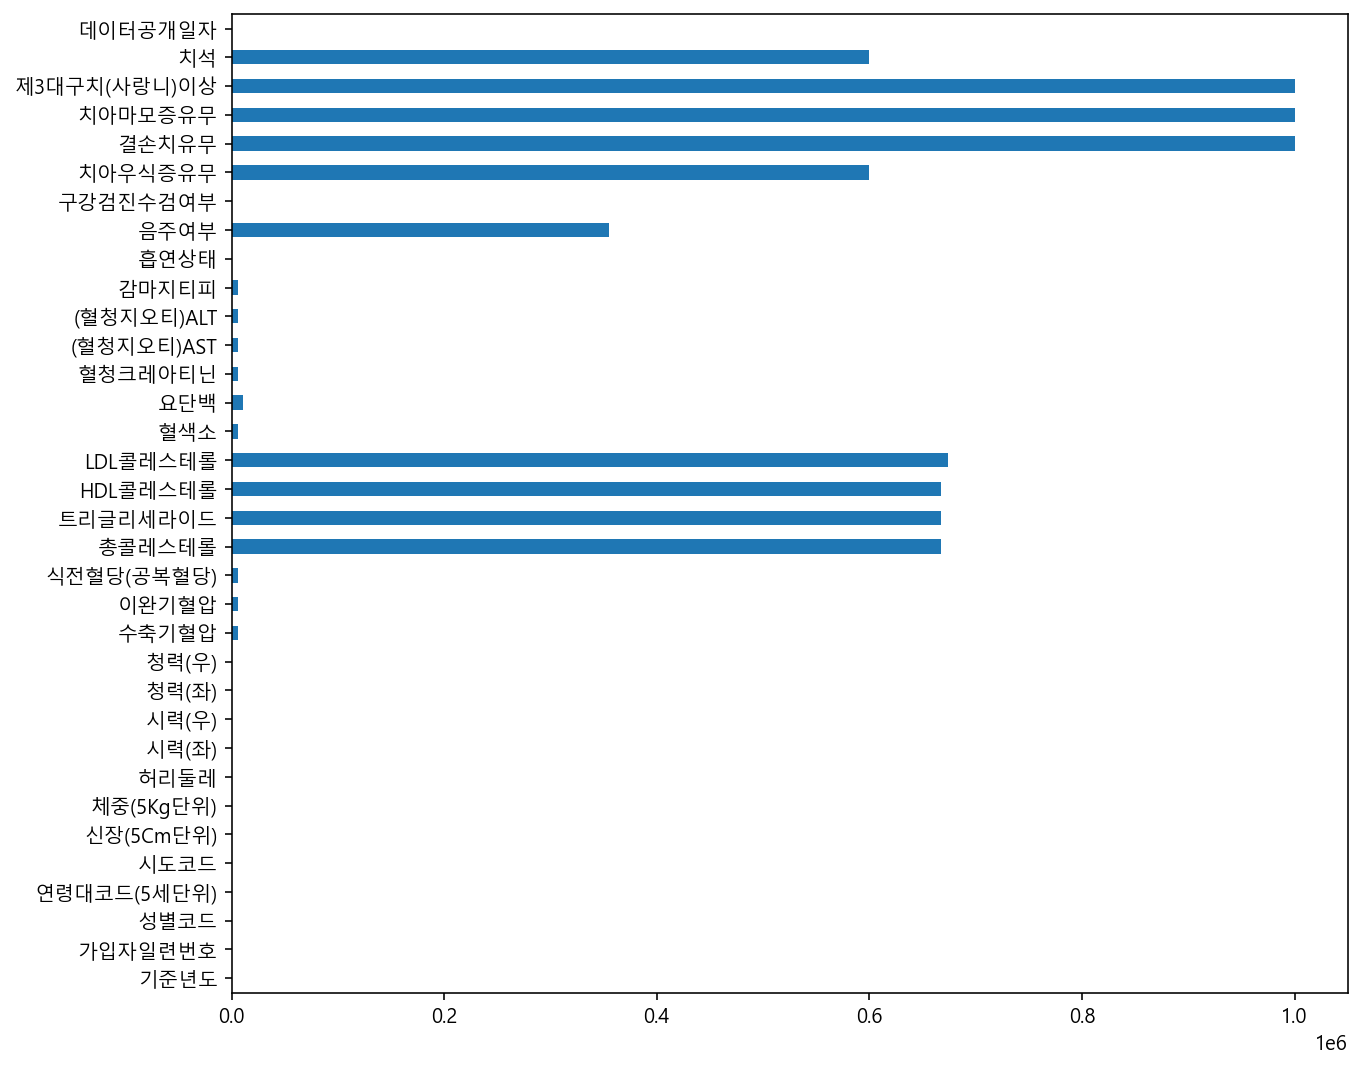

In [22]:
# Pandas 에 내장된 plot 을 통해 시각화합니다.
df.isnull().sum().plot.barh(figsize=(10, 9))

## 8. 일부 데이터 요약하기

In [26]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
# df['(혈청지오티)ALT']: 시리즈 형태
df[['(혈청지오티)ALT', '(혈청지오티)ALT']].head()
# 이차원 dataframe 형태

,(혈청지오티)ALT,(혈청지오티)ALT
0,8.0,8.0
1,45.0,45.0
2,47.0,47.0
3,10.0,10.0
4,26.0,26.0


In [28]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 요약합니다.
# df[['(혈청지오티)ALT', '(혈청지오티)ALT']].info()
df[['(혈청지오티)ALT', '(혈청지오티)ALT']].describe()

,(혈청지오티)ALT,(혈청지오티)ALT
count,994094.000000,994094.000000
mean,26.287882,26.287882
std,27.275675,27.275675
min,1.000000,1.000000
25%,15.000000,15.000000
50%,20.000000,20.000000
75%,30.000000,30.000000
max,5896.000000,5896.000000


## 9. `value_counts` 로 값 집계하기

In [31]:
# value_counts 를 통해 성별코드로 그룹화하고 갯수를 집계합니다.
# 빈도를 집계할 때 value_counts 사용
df['성별코드'].value_counts()

1    535600
2    464400
Name: 성별코드, dtype: int64

In [32]:
# value_counts 를 통해 흡연상태로 그룹화하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    607352
3.0    214205
2.0    178209
Name: 흡연상태, dtype: int64

## 10. `groupby` 와 `pivot_table` 사용하기

### 10.1. `groupby`

In [40]:
# groupby 를 통해 데이터를 그룹화합니다.
# 성별코드로 그룹화한 데이터를 세어봅니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    535600
2    464400
Name: 가입자일련번호, dtype: int64

In [43]:
# 성별코드와 음주여부로 그룹화하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0          6
      1.0     416497
2     0.0          5
      1.0     228549
Name: 가입자일련번호, dtype: int64

In [48]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     79.500000
      1.0     53.739738
2     0.0     13.200000
      1.0     23.949196
Name: 감마지티피, dtype: float64

In [47]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean         std   min    25%   50%    75%    max
성별코드 음주여부                                                                  
1    0.0        6.0  79.500000  141.524203  15.0  16.75  21.5  32.25  368.0
     1.0   415735.0  53.739738   65.508947   1.0  23.00  35.0  60.00  999.0
2    0.0        5.0  13.200000    6.379655   8.0   9.00  12.0  13.00   24.0
     1.0   228055.0  23.949196   31.766087   1.0  13.00  17.0  24.00  999.0

In [51]:
# agg 를 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0        6  79.500000    21.5
     1.0   415735  53.739738    35.0
2    0.0        5  13.200000    12.0
     1.0   228055  23.949196    17.0

### 10.2. `pivot_table`

In [60]:
# 음주여부에 따른 그룹회된 수를 피벗테이블로 구합니다.
df.pivot_table(index='음주여부', values='가입자일련번호', aggfunc='count')
# pivot: 연산을 사용하지 않고 데이터의 형태만 바꾸고자할 때
# pivot_table: 연산을 사용

,가입자일련번호
음주여부,
0.0,11
1.0,645046


In [67]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df, index='음주여부', values='감마지티피')

,감마지티피
음주여부,
0.0,49.363636
1.0,43.186791


In [68]:
# 기본값은 평균을 구하지만 aggfunc 를 통해 지정해줄 수 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc='mean')

,감마지티피
음주여부,
0.0,49.363636
1.0,43.186791


In [69]:
# aggfunc 에 여러 값을 한 번에 지정할 수 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피',
               aggfunc=['mean', 'median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,49.363636,16.0
1.0,43.186791,27.0


In [70]:
# aggfunc 에 describe 를 사용해 통계요약값을 한 번에 볼 수 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피',
               aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,12.5,16.0,24.0,11.0,368.0,49.363636,8.0,105.970064
1.0,17.0,27.0,47.0,643790.0,999.0,43.186791,1.0,57.720906


In [71]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다.
pd.pivot_table(df, index=['성별코드', '음주여부'], values='감마지티피',
               aggfunc='describe')

25%   50%    75%     count    max       mean   min         std
성별코드 음주여부                                                                  
1    0.0   16.75  21.5  32.25       6.0  368.0  79.500000  15.0  141.524203
     1.0   23.00  35.0  60.00  415735.0  999.0  53.739738   1.0   65.508947
2    0.0    9.00  12.0  13.00       5.0   24.0  13.200000   8.0    6.379655
     1.0   13.00  17.0  24.00  228055.0  999.0  23.949196   1.0   31.766087

## 11. 전체 데이터 시각화하기